## Project Overview (property appraisal with Decision Tree Regression)
The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to **estimate the best selling price** for your clients' homes.

This project requires Python and the following Python libraries installed:

- NumPy
- Pandas
- matplotlib
- scikit-learn

Evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its **monetary value**. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

### Data:
The modified Boston housing dataset consists of **489** data points, with each datapoint having 3 features. This dataset is a modified version of the "Boston Housing dataset" found on the 'UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html)'.

Features
- **RM:** average number of rooms per dwelling
- **LSTAT:** percentage of population considered lower status
- **PTRATIO:** pupil-teacher ratio by town

Target Variable 
- **MEDV:** median value of owner-occupied homes

### Note: 
The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
 - 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
 - 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
 - The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
 - The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/2.MLND+SDC/L1/1.Evaluation & Validation/data_01/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## 1. Data Exploration

- Make a cursory investigation about our data.
- Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable.

### (1-a) Implementation: Statistics

Calculate descriptive statistics about the Boston housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model. 

In [2]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

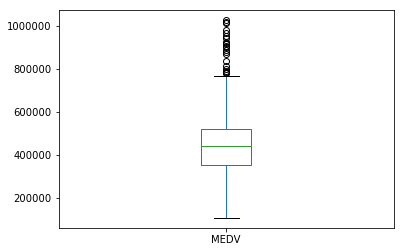

In [3]:
prices.plot(kind='box')

In [4]:
'''
# With pandas

# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))
'''

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266786


In [17]:
# With numpy

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13



### (1-b) Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Q. Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.


**Hint: This problem can be phrased using examples like below.

- Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7? (.....worth less)
- Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20? (.....worth more)
- Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15? (.....worth more)

**Answer:** 
- I think: 
  - 'RM' might be directly proportional to 'MEDV' because in general more rooms are highly valued. 
  - 'LSTAT' might be inversely proportional to 'MEDV' because in general people do not want to live in a poor neighborhood. 
  - 'PTRATIO' might be inversely proportional to 'MEDV' because in general people do not want to send their children to the school with higher ratio of students to teachers.  

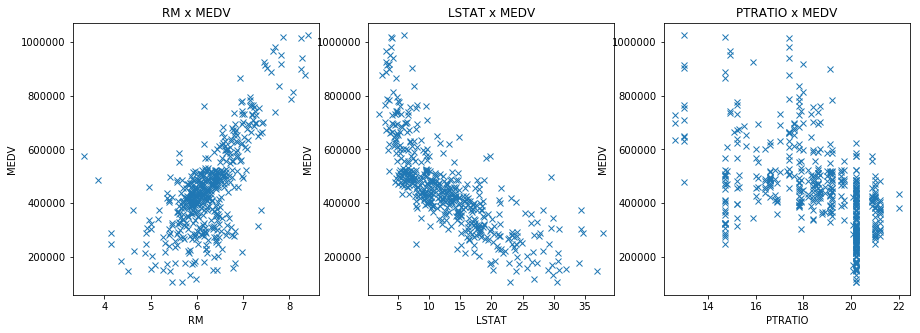

In [6]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'x')
    plt.title('%s x MEDV' % col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## 2. Developing a tool before modelling

Develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### (2-a) Implementation: a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over **training** and **testing**. This is typically done using some type of **performance metric**, whether it is through calculating some type of **error**, the **goodness of fit**, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### (2-b) Question 2 - Example (Goodness of Fit)
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [8]:
# Use the `performance_metric` function and calculate this model's coefficient of determination.

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


#### Q. Would you consider this model to have successfully captured the variation of the target variable? Why or why not?

Hint: The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
- R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
- R2 score of 1 means the dependent variable can be predicted from the independent variable.
- R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable.
- R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** 
- I think:
  - The model is doing well. R2 score is 0.923, thus the model's predictor is explaining the 92.3% of the variance of our response variable(True_value)  

### (2-c) Implementation: Shuffle and Split Data

Next, take the Boston housing dataset and split the data into training and testing subsets. 
- Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

- Use **`train_test_split()`** from `**sklearn.cross_validation**` to shuffle and split the features and prices data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for **`train_test_split()`** to a value of your choice. This ensures results are consistent.
- Assign the **train** and **testing** splits to `X_train`, `X_test`, and `y_train`, `y_test`.

In [9]:
from sklearn.cross_validation import ShuffleSplit #????????????????

# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: shuffle and split the data into training and testing subsets
X = np.array(features)
y = np.array(prices)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


C:\Users\Minkun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### (2-d) Question 3 - Training and Testing
**Q. What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?**

Hint: Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:**
- I think:
  - By keeping track of the size-ratio of our training and testing subsets, we can determine how **training set** size we choose affects the **error** sizes of training & testing set, which will help detect over/under-fitting and allow us to opt for the best ratio of training, test set. For example, when the training set size increases, we can say training error tends to increase and testing error tends to decrease. If these two errors converge to the higher level, we say 'underfitting' and if do not converge at all (i.e, no relation), we say 'overfitting'.   

## 3. Optimizing Model Performance
Take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing **'max_depth'** parameter on the **full training set** to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

#### Learning Curves
The following code cell produces four graphs for a **decision tree** model with different **maximum depths**. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). **The model is scored on both the training and testing sets using R<sub>2</sub>?, R<sup>2</sup>.**

C:\Users\Minkun\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


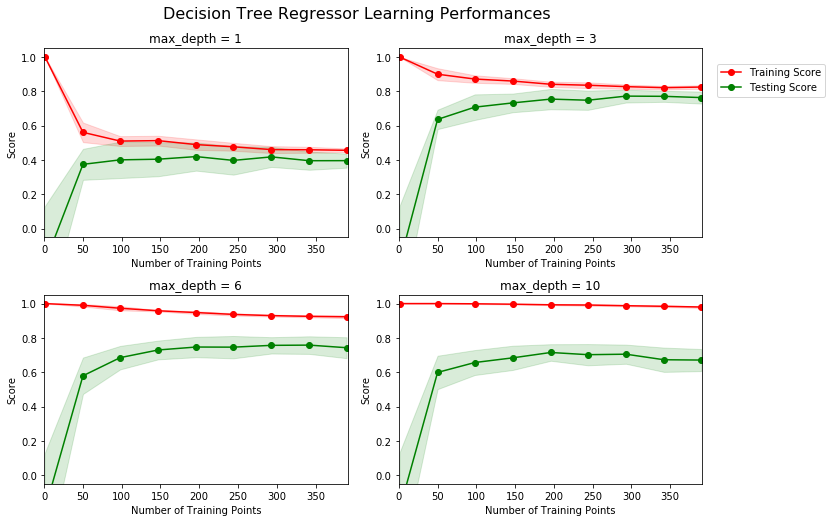

In [10]:
# Import supplementary visualizations code visuals.py
import visuals as vs

# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### (3-a) Question 4 - Learning the Data
**Q. Choose one of the graphs above and state the maximum depth for the model.**

**Q. What happens to the score of the training curve as more training points are added? What about the testing curve?**

**Q. Would having more training points benefit the model?**

Hint: Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary? Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**
- I think:
  - I opt for the LearningCurve graph with max_depth of 3. They converge to higher score..so must be the best fit !
  - As the size of the training point increases, the training score decrease (because of the increased error) while the testing score increases (because of the decreased error). As a result, the training LearningCurve and testing LearningCurve in general would converge to the same score in the end; however, when the model registers overfitting, the overly trained model is not able to make correct prediction, there appears a certain gap between the errors coming from training and testing in the end, thus never converge.
  - In general, the more training points result in the better modelling because the more samples bring out better accuracy. However, the size of our data set we have is limited so we need to find the the smallest size of the training set that makes the two LearningCurves converge to the same value. In addition, as can be seen from the charts above, the model improvement stopped after data point size of around 300, which means, in this model, it is not until the model has more than the certain size of data points(300) that the model shows the best performance. 
  
> My tutor in Udacity said: Collecting additional data in real life scenario might be really time consuming and expensive and doesn't ensure improvement in your model—thus it might be useful to plot something like these learning curves to determine whether additional data collection is required. However, some algorithms (mostly those in deep learning) can make use of more and more data to improve their performance.

http://fastml.com/how-much-data-is-enough/

https://machinelearningmastery.com/much-training-data-required-machine-learning/

#### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. 

Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

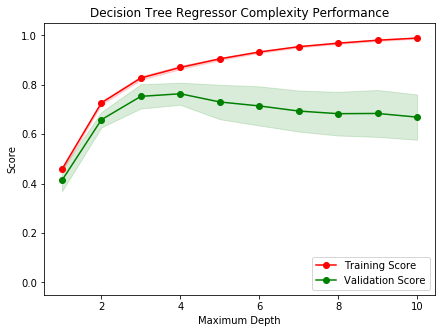

In [11]:
vs.ModelComplexity(X_train, y_train)

### (3-b) Question 5 - Bias-Variance Tradeoff

**Q. When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?**

**Q. How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?**

Hint: High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**
- I think:
  - With a maximum depth of 1, the model will suffer from high bias because of underfitting. 
  - With a maximum depth of 10, the model will suffer from high variance because of overfitting. In the complexity curve above, when the depth is 1, both training and testing score converge to the score of 0.4, and when the depth is 10, they drift farther apart from each other. The convergence to the lower score indicates 'underfitting' and being estranged each other refers 'overfitting'.


### (3-c) Question 6 - Best-Guess Optimal Model

**Q. Which maximum depth do you think results in a model that best generalizes to unseen data?**

**Q. What intuition lead you to this answer?**

Hint: Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**
- I think:
  - At the depth of 3 to 4, the testing score reaches the maximum score, thus we can consider it as the best depth for the best model.
  - As seen in the graph, beyond the point of 4, the model becomes overcomplicated and the testing score get lower. 

### (4-a) Question 7 - Grid Search CV

**Q. What is the grid search technique?**

**Q. How it can be applied to optimize a learning algorithm?**

Hint: When explaining the Grid Search technique, be sure to touch upon why it is used, what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**
- I think:
  - When we fit our model, sometimes tuning the parameters in a learning algorithm are very hard. The GridSearch offers an optimal parameter tune automatically.
  - As explained in the syntax of the GridSearch: **GridSearchCV(classifier, parameter dictionary, validation metric)**, we define the classifier, select parameters and their possible values to form a dictionary, then opt for a validation metric. Grid refers its optimization procedure by comparing the crisscrossing matches between selected parameters and possible values, forming a grid. For example, in SVM, there are too many parameters such as kernel, degree, gamma, and C. But we can imagine several expected groups of values with respect to the choice of parameters such as 'kernel of poly: degree of 1,2,3...', 'kernel of rbf: gamma of 1,2,..', and 'C of 0.1, 1, 10..'. We form a dictionary, using those groups then run the GridSearch. 
  
> My tutor said: Since grid search is an exhaustive search (meaning it has to train and evaluate a whole model for each hyperparameter combination), it's computationally expensive and memory inefficient. Fortunately for us, our beloved scikit-learn offers a better alternative: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881

### (4-b) Question 8 - K-fold CV

**Q. What is the k-fold cross-validation training technique?**

**Q. What benefit does this technique provide for grid search when optimizing a model?**

Hint: When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that: [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) 

**Answer:**
- I think:
  - The K-fold cross validation refers the way to split into the training, testing set. In the training set only, we break our training set into K groups and the one of k groups performs as a testing set again, and each group takes a turn during the K times of algorithm runnings. As self-explained in the name of 'cross', after K times of the algorithm-running, we average out the K results, which becomes the representative result of the algorithm we run. 
  - The GridSearch optimization provides the result that comes from a particular subset of our data, which can cause 'overfitting'. BY using K-fold CV, we can do multiple GridSearch optimizations with respect to diverse subsets of our data, thus improve the accuracy. This means the specific benefit of k-fold CV for grid search lies in minimizing the risk of overfitting hyperparameters onto the training data set. Many people forget about overfitting hyperparameters.  

https://www.youtube.com/watch?v=hihuMBCuSlU

## 4. Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from the made-up function **fit_model()**.

### > Implementation: Fitting a Model with 'ShuffleSplit()'
Our final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as **how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.** Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. 

The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.


ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.

For the `fit_model()` function in the code cell below, you will need to implement the following:

- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the ????`performance_metric`???? function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [12]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    from sklearn.cross_validation import ShuffleSplit 
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 42)

    # TODO: Create a decision tree regressor object
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=9)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import make_scorer, r2_score
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train); reg

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


### (4-c) Question 9 - Optimal Model

**Q. What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?**

Hint: The answer comes from the output of the code snipped above.

**Answer: **
- I think:
  - The result of the 'fit_model()' function says optimal depth is 3 which matches my interpretation of the model complexity graph in question 6. 

### > Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned **what the best questions to ask about the input data are**, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

In [14]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $345,707.55
Predicted selling price for Client 2's home: $260,645.00
Predicted selling price for Client 3's home: $903,393.75


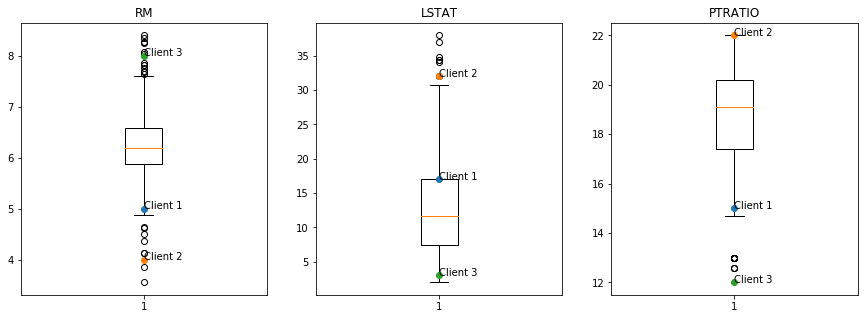

In [16]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    for j in range(3):
        plt.plot(1, client_data[j][i], marker='o')
        plt.annotate('Client %s' % str(j+1), xy=(1, client_data[j][i]))

### (4-d) Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

**Q. What price would you recommend each client sell his/her home at?** 

**Q. Do these prices seem reasonable given the values for the respective features?** 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response. Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

**Answer:**
- I think:
  - for Client_1: USD 345,708 
  - for Client_2: USD 260,645 
  - for Client_3: USD 903,394
  - Those price estimation seems reasonable based on the statistics we got from the 'Data Exploration' section. More rooms, less poverty level, low Student-teacher ratio result in higher value. 

### > Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Let's run the 'fit_model()' function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### (4-e) Question 11 - Applicability

**Q. Discuss whether the constructed model should or should not be used in a real-world setting.**  

Hint: Take a look at the range in prices as calculated in the code snipped above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**
- I think:
  - Our model should address several issues in order to be useful in a real-world stting. 
  - We should add terms reflecting inflation.
  - Fields we have are not sufficient to explain the home price. There are so many factors to consider - amenity, growth potential, building law, etc. For example, we should add terms explaining some future growth potential of the neighborhood which includes the proximity to main stems or business districts. The distance to work is also another critical factor to consider besides the distance to school. The life style in rural area is obviously different, thus factors would be different. It's all about people's preferences of their living environment.   
  - Once we collect perfect list of factors, our model might produce consistent prediction with some variance around 10% ?
  - The home price is affected by both external and internal conditions. 